## Data Description:


The data scientists at BigMart have collected sales data for different products across different stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.



Variable Description:



Item_Identifier ---- Unique product ID



Item_Weight ---- Weight of product



Item_Fat_Content ---- Whether the product is low fat or not



Item_Visibility ---- The % of the total display area of all products in a store allocated to the particular product



Item_Type ---- The category to which the product belongs



Item_MRP ---- Maximum Retail Price (list price) of the product



Outlet_Identifier ---- Unique store ID



Outlet_Establishment_Year ---- The year in which the store was established



Outlet_Size ---- The size of the store in terms of ground area covered



Outlet_Location_Type ---- The type of city in which the store is located



Outlet_Type ---- Whether the outlet is just a grocery store or some sort of supermarket



Item_Outlet_Sales ---- sales of the product in t particular store. This is the outcome variable to be predicted.

## Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import re

## Loading the data:

In [2]:
df = pd.read_csv("Train (1).csv")

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data preprocessing and cleaning:

In [3]:
# Check the number of rows and columns in the data set:
df.shape

(8523, 12)

In [4]:
# Getting more information about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Check for missing values:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see above, we have (1463) missing values out of a total of (8523) values in the “Item_Weight” column, which is a large number. We also have (2410) missing values out of a total of (8523) values in the "Outlet_Size" column, which is also a large number, so replacing these missing values would be more efficient than dropping them.



we will replace the missing values in the "Item_Weight" with the column's mean value, and replace the missing values in the "Outlet_Size" with the column's mode value.

In [6]:
# Getting the mean value of the "Item_Weight" column

Item_Weight_mean = df["Item_Weight"].mean()

Item_Weight_mean

12.857645184136183

In [7]:
# Replacing the missing values in the "Item_Weight" with the column's mean value

df["Item_Weight"].fillna(Item_Weight_mean, inplace=True)

In [8]:
df["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [9]:
# Replacing the missin values in the "Outlet_Size" column with mode
df["Outlet_Size"].fillna("Medium",inplace=True)

In [10]:
# Check again for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Exploratory data analysis:

In [11]:
# Getting a Statistical summary:

df.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0,8523.0,8523.0,8523.0,8523.0
mean,13.0,0.0,141.0,1998.0,2181.0
std,4.0,0.0,62.0,8.0,1706.0
min,5.0,0.0,31.0,1985.0,33.0
25%,9.0,0.0,94.0,1987.0,834.0
50%,13.0,0.0,143.0,1999.0,1794.0
75%,16.0,0.0,186.0,2004.0,3101.0
max,21.0,0.0,267.0,2009.0,13087.0


In [12]:
sns.set()
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

##### The Distribution of the "Item _Weight" column:

C:\Users\User\anaconda4new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


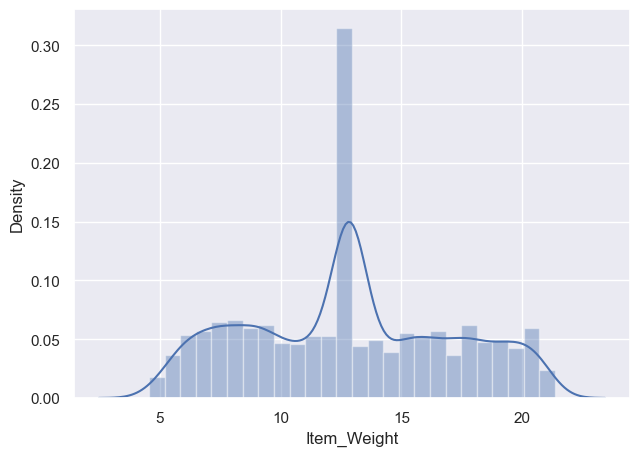

In [13]:
sns.distplot(df["Item_Weight"]);

##### The Distribution of the "Item_Visibility" column:

C:\Users\User\anaconda4new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


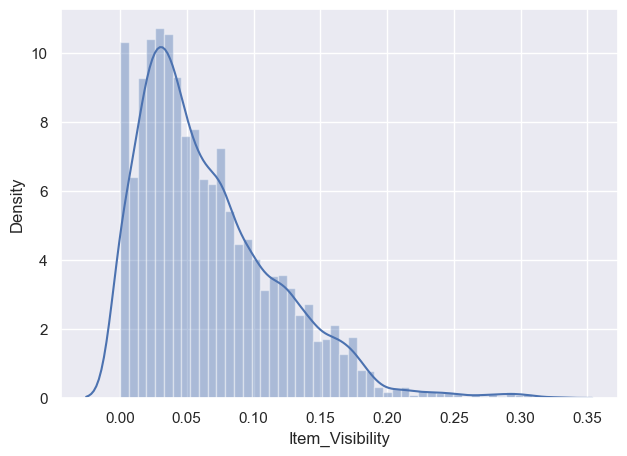

In [14]:
sns.distplot(df["Item_Visibility"]);

##### The Distribution of the "Item_MRP" column:

C:\Users\User\anaconda4new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


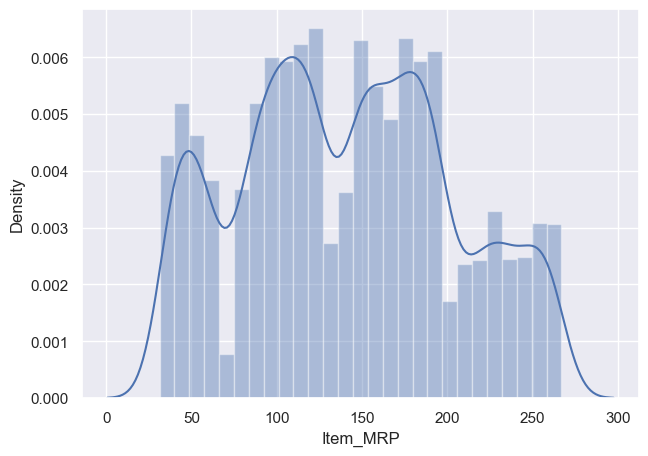

In [15]:
sns.distplot(df["Item_MRP"]);

 ##### The Distribution of the "Item_Outlet_Sales" column:

C:\Users\User\anaconda4new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


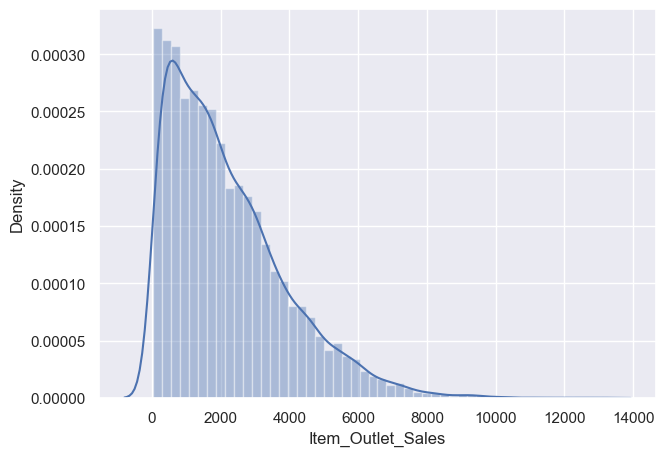

In [16]:
sns.distplot(df["Item_Outlet_Sales"]);

##### Number of stores established each year:

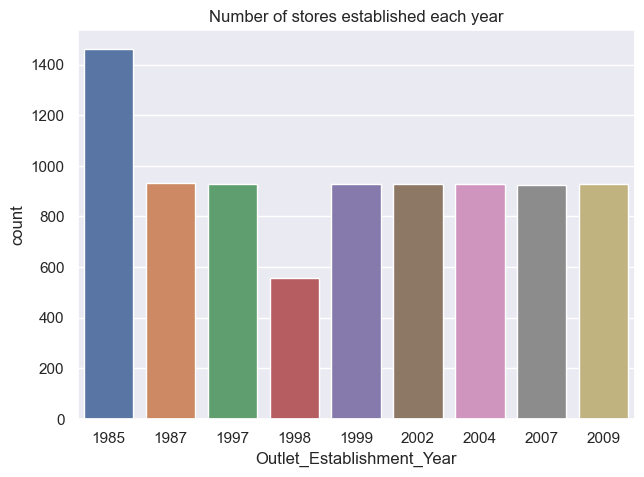

In [17]:
sns.countplot(x="Outlet_Establishment_Year", data=df)
plt.title("Number of stores established each year");

In [18]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


##### How many items do we have from each Fat content ?

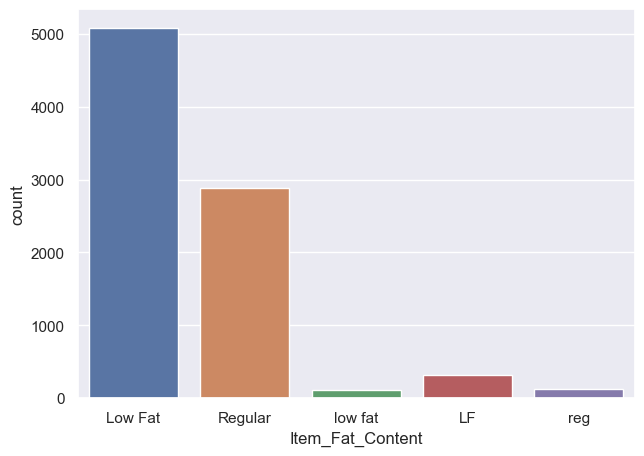

In [19]:
sns.countplot(x="Item_Fat_Content",data=df);

As we see above, most of the products are a low fat content, however this column needs to be cleaned, and we will do that after completing the data analysis step.

##### How many items from each type do we have?

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

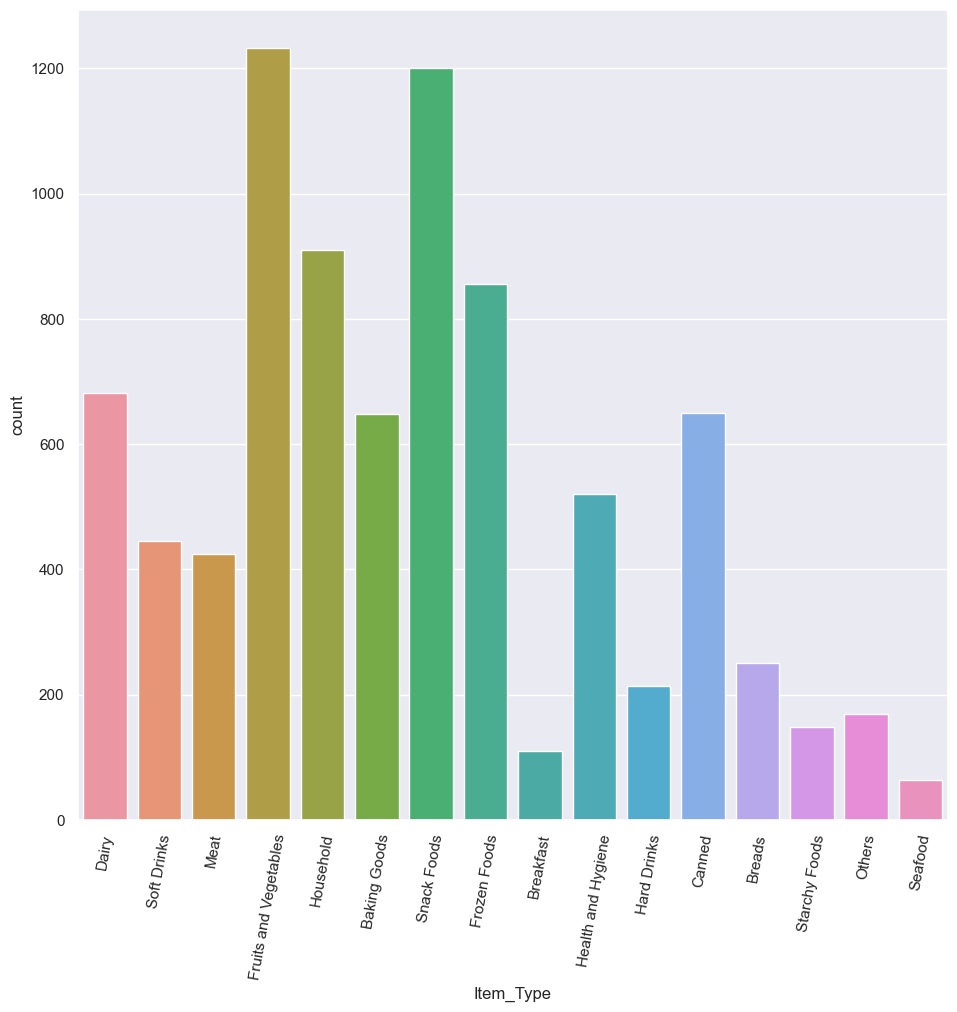

In [20]:
plt.figure(figsize=(10,10))
plt.xticks(rotation = 80)
sns.countplot(x="Item_Type", data=df)

##### Which items achieved the most sales?

In [21]:
item_grp = df.groupby("Item_Type")
item_agg = item_grp["Item_Outlet_Sales"].sum().round()

item_agg = item_agg.reset_index()
item_agg

,Item_Type,Item_Outlet_Sales
0,Baking Goods,1265525.0
1,Breads,553237.0
2,Breakfast,232299.0
3,Canned,1444151.0
4,Dairy,1522594.0
5,Frozen Foods,1825735.0
6,Fruits and Vegetables,2820060.0
7,Hard Drinks,457793.0
8,Health and Hygiene,1045200.0
9,Household,2055494.0


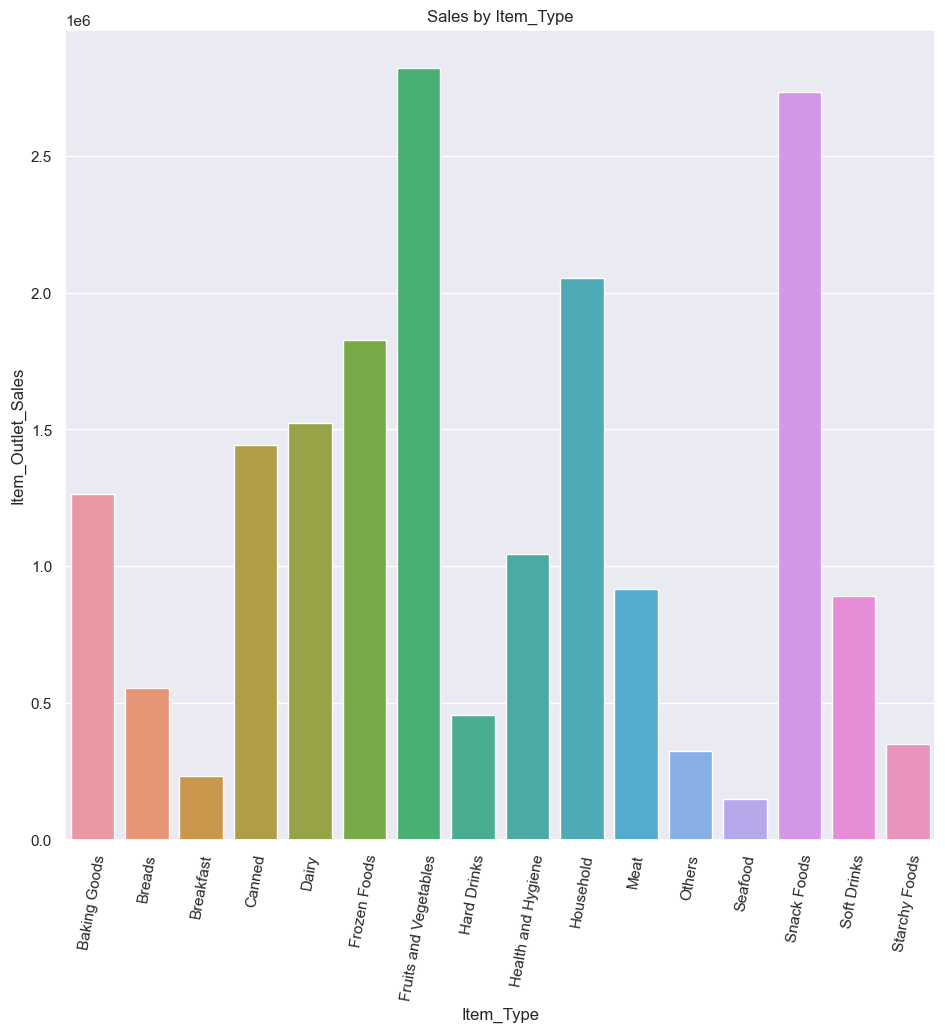

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=item_agg)
plt.title("Sales by Item_Type")
plt.xticks(rotation = 80);

 ##### How many outlets from each size do we have? 

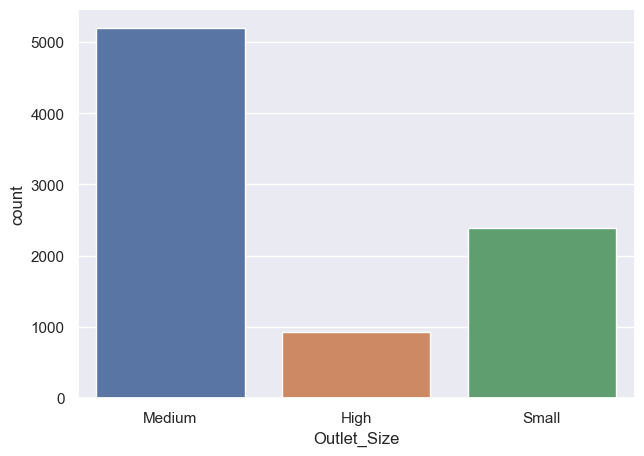

In [23]:
sns.countplot(x="Outlet_Size", data=df);

##### How many outlet's locations from each location type do we have?

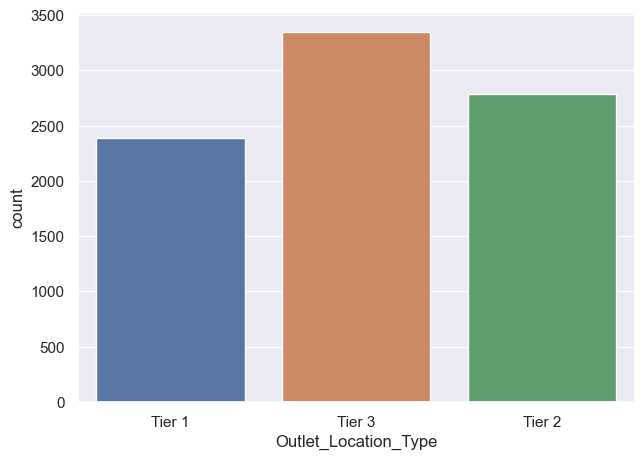

In [24]:
sns.countplot(x="Outlet_Location_Type", data=df);

##### Which Outlet Location_Type achieved the most sales?

In [25]:
location_grp = df.groupby("Outlet_Location_Type")
location_agg = location_grp["Item_Outlet_Sales"].sum().round()

location_agg = location_agg.reset_index()
location_agg

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,4482059.0
1,Tier 2,6472314.0
2,Tier 3,7636753.0


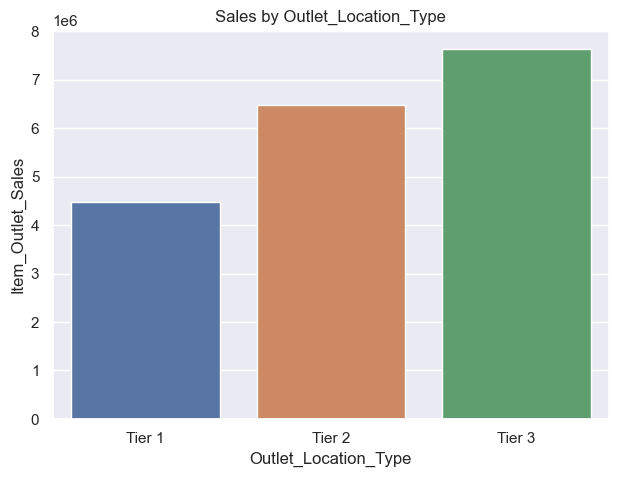

In [26]:
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=location_agg)
plt.title("Sales by Outlet_Location_Type");

##### How many outlets from each type do we have?

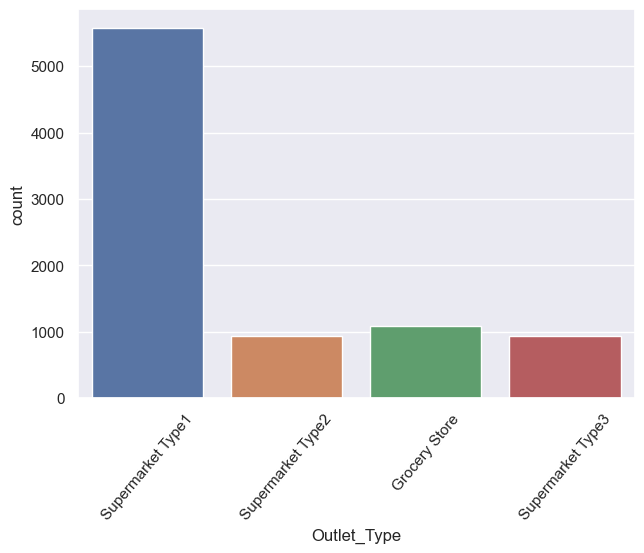

In [27]:
sns.countplot(x="Outlet_Type",data=df)
plt.xticks(rotation = 50);

##### Which Outlet _Type achieved the most sales?

In [28]:
outlet_grp = df.groupby("Outlet_Type")
outlet_agg = outlet_grp["Item_Outlet_Sales"].sum().round()

outlet_agg = outlet_agg.reset_index()
outlet_agg

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,368034.0
1,Supermarket Type1,12917342.0
2,Supermarket Type2,1851823.0
3,Supermarket Type3,3453926.0


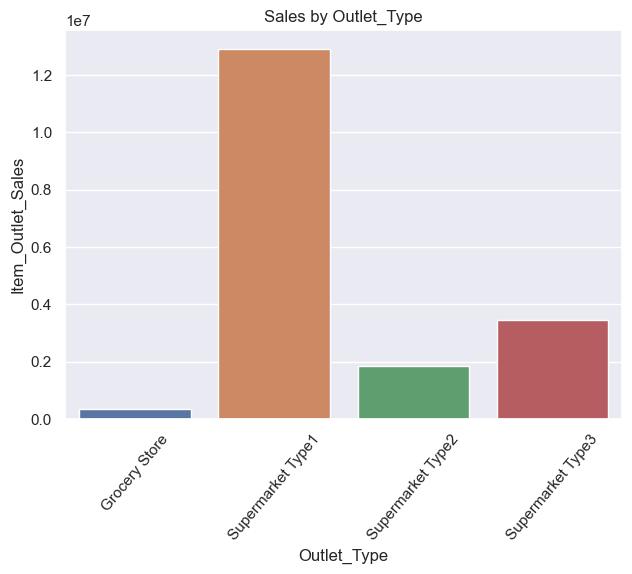

In [29]:
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=outlet_agg)
plt.title("Sales by Outlet_Type")
plt.xticks(rotation = 50);

## Data preprocessing part 2:

In [30]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#####  Lets clean the "Item_Fat_Content" column, and change the values to either (Low Fat or Regular):

In [31]:
# First let's check the values we have in the "Item_Fat_Content" column:

df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [32]:
df.replace({"Item_Fat_Content":{"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}}, inplace=True)

In [33]:
# Now let's again check the values we have in the "Item_Fat_Content" column:

df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##### Dropping columns we don't need

In [34]:
df.drop(["Item_Identifier","Outlet_Identifier"],axis=1, inplace=True)
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [36]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [37]:
df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [38]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [39]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

##### Labels encoding

Now we need to transform all categorical columns to numerical columns to feed to the machine learning model


In [40]:
df.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.3,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [41]:
encoder = LabelEncoder()

df["Item_Fat_Content"] = encoder.fit_transform(df["Item_Fat_Content"])

df["Item_Type"] = encoder.fit_transform(df["Item_Type"])

df["Outlet_Size"] = encoder.fit_transform(df["Outlet_Size"])

df["Outlet_Location_Type"] = encoder.fit_transform(df["Outlet_Location_Type"])

df["Outlet_Type"] = encoder.fit_transform(df["Outlet_Type"])

In [42]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


##### Transforming the distribution of the " Item_Outlet_Sales" column to increase the model performance

In [43]:
df["Item_Outlet_Sales"] = np.sqrt(df["Item_Outlet_Sales"])

C:\Users\User\anaconda4new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


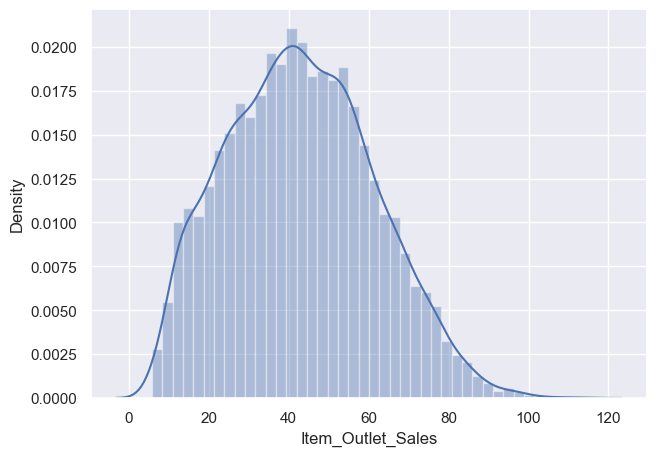

In [44]:
sns.distplot(df["Item_Outlet_Sales"]);

##### Creating X & Y Variable:

In [45]:
x = df.drop(columns="Item_Outlet_Sales", axis =1)
y = df["Item_Outlet_Sales"]

print(x)
print(y)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.000000          6  182.0950   
4           8.930                 0         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0    

##### Data Standrization:

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

print(x_scaled)

##### Creating train and test data:

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

## Training the machine learning model:

In [47]:
regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

##### Predicting on the training data and evaluating the model:

In [48]:
# Predicting on "x_train"

train_pred = regressor.predict(x_train)

In [49]:
# Evaluating the prediction using r squared value:

train_r2 = metrics.r2_score(y_train, train_pred)

print(train_r2)

0.5648291176125393


##### Predicting on the test data and evaluating the model:

In [50]:
test_pred = regressor.predict(x_test)

In [51]:
test_r2 = metrics.r2_score(y_test, test_pred)

print(test_r2)

0.5809108548028676


In [52]:
mse = metrics.mean_squared_error(y_test, test_pred)
print(mse)


147.80892589785427


In [53]:
rmse = np.sqrt(mse)
print(rmse)

12.157669427067601


## NOTE: 
This model will be deployed and available for end user very soon!!.

In [54]:
import pickle

In [55]:
filename = "Big mart Sales Prediction.sav"

pickle.dump(regressor,open(filename,"wb"))